In [1]:
from SN1D import Material, Geo1D, Mesh1D, SNSolver, Diamond, DiamondFixup, Step
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sig1 = 20
sig2 = 5
c = 0.9
hscale = 2*sig1
mat1 = Material(sig1, sig1, 0, 0)
mat2 = Material(sig2, sig2, 0, 0)
mat3 = Material(0, 0, 0, 0)
mat4 = Material(1, 1-c, c, 0)

def source1(x):
    val = 0.
    if x < 2:
        val = sig1
    if x > 5 and x < 6:
        val = 1
    #val = sig1
    return val

In [3]:
geo = Geo1D([0., 2., 3., 5., 8.], [mat1, mat2, mat3, mat4])
def get_mesh_uni(hscale):
    mesh = Mesh1D([2*hscale, 1*hscale, 2*hscale, 3*hscale])
    return mesh
def get_mesh_adapt(hscale):
    mesh = Mesh1D([2*sig1*hscale, 2*sig2*hscale, 2*hscale, 3*hscale])
    return mesh


4
Iterations: 32 error: 8.25279601537332e-05
[0.0, 0.00125, 0.0025, 0.00375, 0.005, 0.00625, 0.0075, 0.00875, 0.01, 0.01125, 0.0125, 0.013750000000000002, 0.015000000000000001, 0.01625, 0.0175, 0.018750000000000003, 0.02, 0.021249999999999998, 0.0225, 0.02375, 0.024999999999999998, 0.026249999999999996, 0.027499999999999997, 0.028749999999999998, 0.029999999999999995, 0.031249999999999993, 0.032499999999999994, 0.033749999999999995, 0.034999999999999996, 0.03625, 0.0375, 0.03875, 0.04, 0.04125, 0.0425, 0.043750000000000004, 0.045000000000000005, 0.046250000000000006, 0.04750000000000001, 0.04875000000000001, 0.05000000000000001, 0.05125000000000001, 0.05250000000000001, 0.05375000000000001, 0.055000000000000014, 0.056250000000000015, 0.057500000000000016, 0.05875000000000002, 0.06000000000000002, 0.06125000000000001, 0.06250000000000001, 0.06375000000000001, 0.06500000000000002, 0.06625000000000002, 0.06750000000000002, 0.06875000000000002, 0.07000000000000002, 0.07125000000000002, 0.0

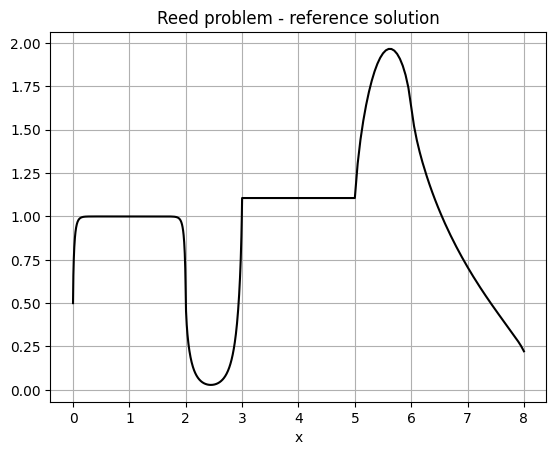

In [ ]:
mesh_ref = get_mesh_adapt(20)
print(len(mesh_ref.nbs))
solver = SNSolver(geo, mesh_ref, source1, sn=32)
solver.solve()
flux_ref, xs_ref = solver.flux, solver.mesh
print(xs_ref)
plt.plot(xs_ref, flux_ref, label='Reference', color='black')
plt.grid()
plt.xlabel('x')
plt.title('Reed problem - reference solution')
plt.draw_all()

Iterations: 29 error: 7.562272561956185e-05
Iterations: 31 error: 9.542968875186908e-05
Iterations: 32 error: 8.101224667345086e-05
Iterations: 32 error: 8.22467795238424e-05


ValueError: x and y must have same first dimension, but have shapes (1,) and (2201,)

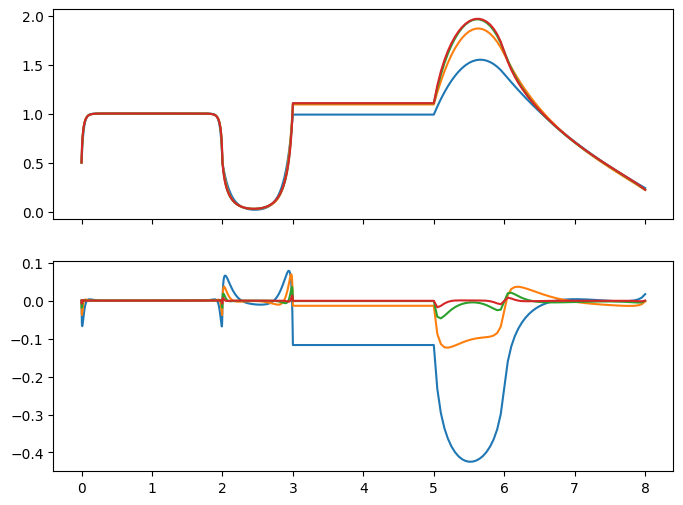

In [ ]:
refines = [2, 4, 8, 16]
mesh_0 = get_mesh_adapt(20)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
for sn in refines:
    solver = SNSolver(geo, mesh_0, source1, sn=sn)
    flux, mesh = solver.solve()
    ax1.plot(mesh, flux, label=f"S {sn}")
    flux_interp = np.interp(mesh, xs_ref, flux_ref)
    relative_diff = (flux - flux_interp) / np.abs(flux_interp)
    diff = (flux - flux_interp)
    #ax2.plot(mesh0, abs(relative_diff), label=f"S {sn}")
    ax2.plot(mesh, diff, label=f"S {sn}")
ax1.plot(xs_ref, flux_ref, label='Reference', color='black', linestyle='--')
ax1.legend()
ax1.grid()
ax1.set_ylabel('flux')
ax1.set_title('Flux for different SN orders')

ax2.legend()
ax2.grid()
#ax2.set_yscale('log')
#ax2.set_ylim(1e-3, 1)
ax2.set_xlabel('x')
ax2.set_ylabel('Ratio')
ax2.set_title('Relative difference from reference solution')

plt.tight_layout()
plt.draw()


In [ ]:
refines = [1, 2, 5, 10]

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
for hscale in refines:
    mesh = Mesh1D([2*hscale, 1*hscale, 2*hscale, 3*hscale])
    solver = SNSolver(geo, mesh, source1, sn=16)
    flux, mesh0 = solver.solve()
    ax1.plot(mesh0, flux, label=f"refine {hscale}")
    flux_interp = np.interp(mesh0, x0_ref, flux_ref)
    relative_diff = (flux - flux_interp) / np.abs(flux_interp)
    diff = (flux - flux_interp)
    #ax2.plot(mesh0, np.abs(relative_diff), label=f"refine {hscale}")
    ax2.plot(mesh0, diff, label=f"refine {hscale}")
ax1.plot(x0_ref, flux_ref, label='Reference', color='black', linestyle='--')
ax1.legend()
ax1.grid()
ax1.set_ylabel('flux')
ax1.set_title('Flux for different mesh refinements')

ax2.legend()
ax2.grid()
#ax2.set_ylim(0, 2)
#ax2.set_yscale('log')
ax2.set_xlabel('x')
ax2.set_ylabel('Difference')
ax2.set_title('Difference from reference solution')

plt.tight_layout()
plt.draw()


In [ ]:
schemes = [Diamond(), DiamondFixup(), Step()]
snames = ["Diamond", "DiamondFixup", "Step"]
hscale_values = [1, 2, 5, 10]

fig, axes = plt.subplots(2, len(hscale_values), figsize=(16, 8), sharex=True)

for col, hscale in enumerate(hscale_values):
    mesh = get_mesh_uni(hscale)
    
    for ii in range(3):
        scheme = schemes[ii]
        solver_temp = SNSolver(geo, mesh, source1, sn=8, scheme=scheme)
        flux, mesh0 = solver_temp.solve()
        
        # First row: flux comparison
        axes[0, col].plot(mesh0, flux, label=f"{snames[ii]}")
        
        # Second row: relative difference from reference
        flux_interp = np.interp(mesh0, x0_ref, flux_ref)
        relative_diff = (flux - flux_interp) / np.abs(flux_interp)
        axes[1, col].plot(mesh0, relative_diff, label=f"{snames[ii]}")
    
    # Plot reference on first row
    axes[0, col].plot(x0_ref, flux_ref, 'k--', alpha=0.5, label='Reference')
    
    # Formatting for first row
    axes[0, col].legend(fontsize=8)
    axes[0, col].grid(True, alpha=0.3)
    axes[0, col].set_title(f'Mesh scale: {hscale}')
    if col == 0:
        axes[0, col].set_ylabel('Flux')
    
    # Formatting for second row
    axes[1, col].legend(fontsize=8)
    axes[1, col].grid(True, alpha=0.3)
    axes[1, col].set_xlabel('x')
    if col == 0:
        axes[1, col].set_ylabel('Relative Error')

fig.suptitle('Comparison of Spatial Discretization Schemes', fontsize=14, y=1.00)
plt.tight_layout()
plt.draw()